# Adaline classifications 

By: Avia Oren & Maya Hayat

## Classification Task

Classifying the Hebrew letters "ב" "מ" "ל" using the Adaline algorithm 


### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Reading data and Splitting into Train (80%) and Train(20%)

In [2]:
ogdata = pd.read_csv('C:/Users/Maya/OneDrive/Desktop/vectors.csv', sep=',')
# Complete the path

In [3]:
ogdata

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


Eliminating any rows that are made up complitly of the number 1 or -1 (this is an error)

In [55]:
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == -1 for val in row), axis=1)]
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == 1 for val in row), axis=1)]

In [56]:
data = ogdata

In [57]:
data #printing the data after removing errors

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


# The Adaline Class

In [58]:
class Adaline:
    
    def __init__(self, lr, n_epochs, random_state=None):
        self.lr = lr
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.cost_ = []
     
    #This function is explained in the attached PDF
    def fit(self, X, y):
        if X.shape[0] != y.shape[0]:
            raise ValueError('X and y must have the same number of rows.')
        self.weights = np.random.randn(X.shape[1])
        self.bias = np.random.randn()

        cost_prev = np.inf #set cost prev to infinity
        for i in range(self.n_epochs):
            error = y - self.net_input(X)
            #print(self.net_input(X), error)
            self.weights += self.lr * X.T.dot(error)
            self.bias += self.lr * error.sum()
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            #print(cost, cost_prev)
            if i > 2 and abs(cost - cost_prev) < 0.5:
                print(f"Stopping training after {i+1} epoch to avoid overfitting.")
                break    
            cost_prev = cost
        
        # PLoting the converging graphs
        plt.figure()
        plt.plot(ada.cost_)
        plt.title(f'Fold {i} Cost')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()


    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    
    def net_input(self, X):
        return X.dot(self.weights) + self.bias


## Comparing between "Bet" & "Lamed"

In [39]:
data = ogdata[ogdata['1'] != 3] #Eliminating "Mem" denoted by 3

Stopping training after epoch 228 due to small change in cost.


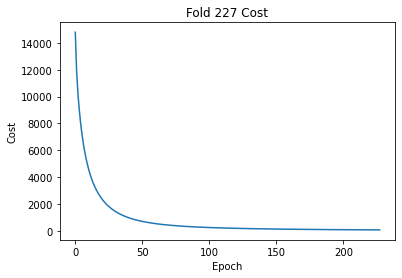

Accuracy 1: 0.87
Standard Deviation 0: 0.6781323990106163
Stopping training after epoch 306 due to small change in cost.


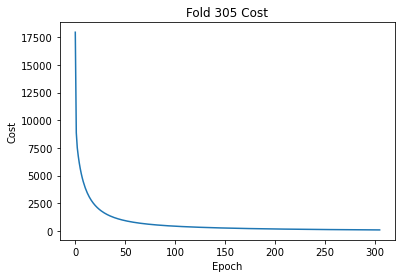

Accuracy 2: 0.90
Standard Deviation 1: 0.5902384922369104
Stopping training after epoch 289 due to small change in cost.


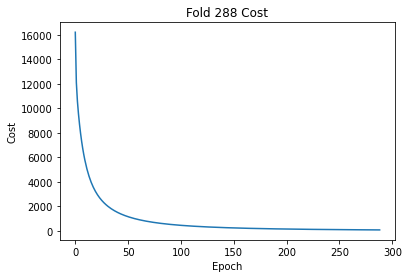

Accuracy 3: 0.88
Standard Deviation 2: 0.651048486077412
Stopping training after epoch 270 due to small change in cost.


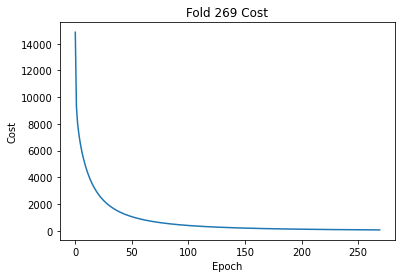

Accuracy 4: 0.86
Standard Deviation 3: 0.7033503382807916
Stopping training after epoch 266 due to small change in cost.


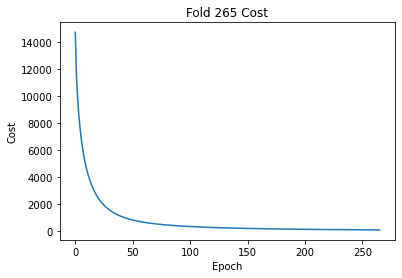

Accuracy 5: 0.77
Standard Deviation 4: 0.8402696758632624
Average Accuracy: 0.86


In [40]:
features = data.iloc[:, 1:]

# Apply normalization using StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
#Adding back the first column to the normalized data
data_normalized = pd.concat([data.iloc[:, 0], normalized_data], axis=1)
data = normalized_data
data = shuffle(normalized_data, random_state=42)

# Separate the labels (y) and features (X) 

X = data.iloc[:, 1:]  #  the remaining columns are the features
y = np.where(data.iloc[:, 0].values !=2, -1, 1) #  the first column contains the labels , need to change the lables to -1 ,1

#cross - validation five times to see the algorithm working on different parts of the text, make sure answer isn't "by luck"

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []


for i in range(n_repeats):

    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    # Training and predicting using the Adaline class above
    ada = Adaline(lr=0.0001, n_epochs=1000, random_state=1)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)



    # Printing the STD and Accuracy
    accuracy = (y_pred == y_test).mean()
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    std_dev = np.std(y_pred)
    print(f'Standard Deviation {i}: {std_dev}')



# Compute and print the average accuracy over all repetitions

average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')

## Comparing between "Bet" & "Mem"

In [51]:
data = ogdata[ogdata['1'] != 2] #Eliminating "Lamed" denoted by 2

Stopping training after epoch 297 due to small change in cost.


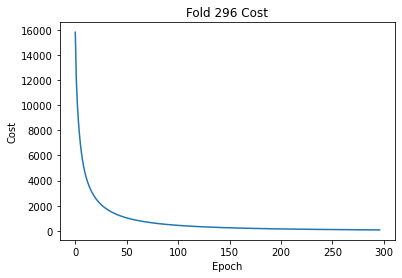

Accuracy 1: 0.84
Standard Deviation 0: 0.7268965363372702
Stopping training after epoch 294 due to small change in cost.


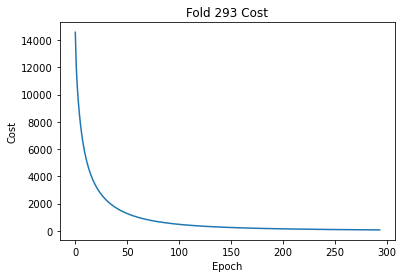

Accuracy 2: 0.77
Standard Deviation 1: 0.8402696758632624
Stopping training after epoch 301 due to small change in cost.


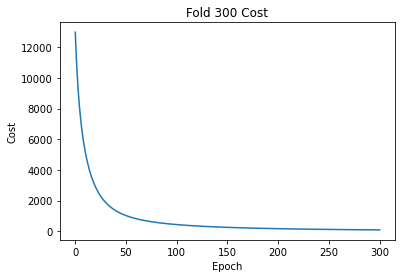

Accuracy 3: 0.89
Standard Deviation 2: 0.6218548385813947
Stopping training after epoch 271 due to small change in cost.


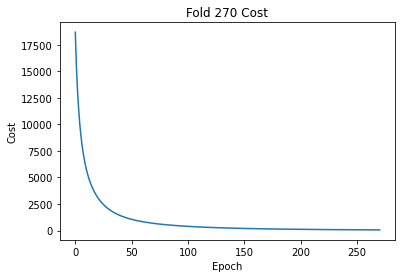

Accuracy 4: 0.83
Standard Deviation 3: 0.7489286876106049
Stopping training after epoch 295 due to small change in cost.


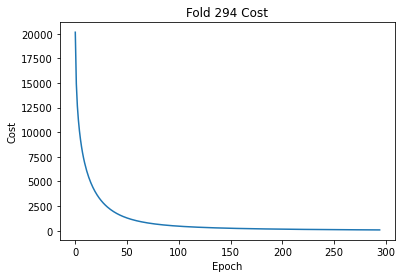

Accuracy 5: 0.87
Standard Deviation 4: 0.6781323990106163
Average Accuracy: 0.84


In [53]:
features = data.iloc[:, 1:]

# Apply normalization using StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
#Adding back the first column to the normalized data
data_normalized = pd.concat([data.iloc[:, 0], normalized_data], axis=1)
data = normalized_data
data = shuffle(normalized_data, random_state=42)

# Separate the labels (y) and features (X) 

X = data.iloc[:, 1:]  #  the remaining columns are the features
y = np.where(data.iloc[:, 0].values !=3, -1, 1) #  the first column contains the labels , need to change the lables to -1 ,1

#cross - validation five times to see the algorithm working on different parts of the text, make sure answer isn't "by luck"

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []


for i in range(n_repeats):

    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    # Training and predicting using the Adaline class above
    ada = Adaline(lr=0.0001, n_epochs=1000, random_state=1)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)



    # Printing the STD and Accuracy
    accuracy = (y_pred == y_test).mean()
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    std_dev = np.std(y_pred)
    print(f'Standard Deviation {i}: {std_dev}')



# Compute and print the average accuracy over all repetitions

average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')

## Comparing between "Lamed" & "Mem"

In [59]:
data = ogdata[ogdata['1'] != 1] #Eliminating "Bet" denoted by 1

Stopping training after epoch 280 due to small change in cost.


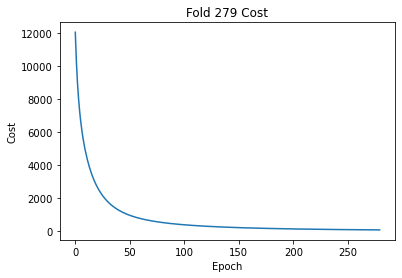

Accuracy 1: 0.87
Standard Deviation 0: 0.681618956706445
Stopping training after epoch 277 due to small change in cost.


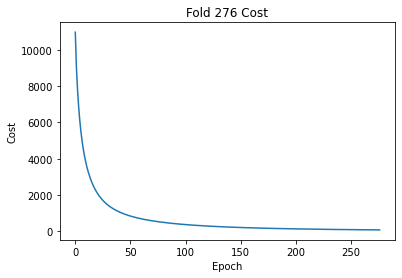

Accuracy 2: 0.88
Standard Deviation 1: 0.6544589202438409
Stopping training after epoch 279 due to small change in cost.


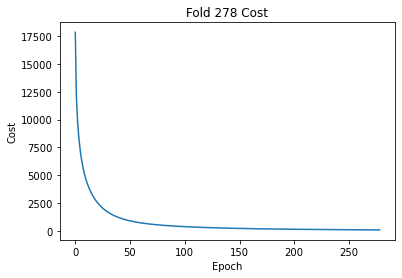

Accuracy 3: 0.90
Standard Deviation 2: 0.5934402468583629
Stopping training after epoch 276 due to small change in cost.


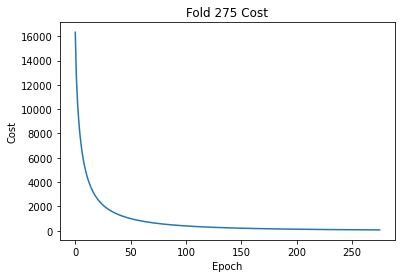

Accuracy 4: 0.85
Standard Deviation 3: 0.7068964266433873
Stopping training after epoch 294 due to small change in cost.


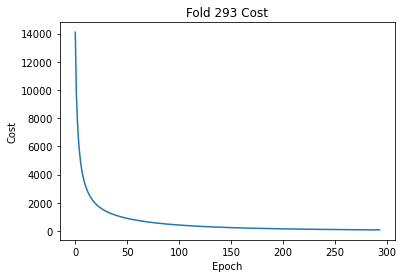

Accuracy 5: 0.83
Standard Deviation 4: 0.752548713197147
Average Accuracy: 0.87


In [50]:
features = data.iloc[:, 1:]

# Apply normalization using StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
#Adding back the first column to the normalized data
data_normalized = pd.concat([data.iloc[:, 0], normalized_data], axis=1)
data = normalized_data
data = shuffle(normalized_data, random_state=42)

# Separate the labels (y) and features (X) 

X = data.iloc[:, 1:]  #  the remaining columns are the features
y = np.where(data.iloc[:, 0].values !=3, -1, 1) #  the first column contains the labels , need to change the lables to -1 ,1

#cross - validation five times to see the algorithm working on different parts of the text, make sure answer isn't "by luck"

n_repeats = 5
test_size = 0.2
n_splits = int(1 / test_size)
accuracies = []


for i in range(n_repeats):

    # Split the data into training and test sets
    split_index = int((i % n_splits) * len(X) * test_size)
    X_test = X[split_index:split_index + int(len(X) * test_size)]
    y_test = y[split_index:split_index + int(len(X) * test_size)]
    X_train = np.concatenate([X[:split_index], X[split_index + int(len(X) * test_size):]])
    y_train = np.concatenate([y[:split_index], y[split_index + int(len(X) * test_size):]])

    # Training and predicting using the Adaline class above
    ada = Adaline(lr=0.0001, n_epochs=1000, random_state=1)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)



    # Printing the STD and Accuracy
    accuracy = (y_pred == y_test).mean()
    accuracies.append(accuracy)
    print(f'Accuracy {i+1}: {accuracy:.2f}')
    std_dev = np.std(y_pred)
    print(f'Standard Deviation {i}: {std_dev}')



# Compute and print the average accuracy over all repetitions

average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')